# In linear regression line have equation y=mx+b

## (I) Calculate value of m and b using sklearn built-in function

#### Import required library

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Read the csv file

In [34]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


#### Plot the dataset value

Text(0, 0.5, 'Package(in lpa)')

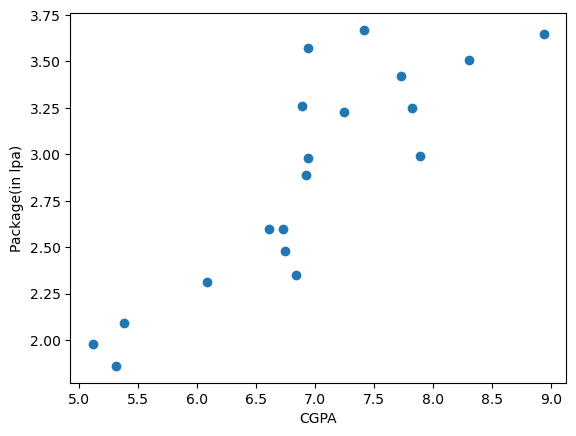

In [35]:
plt.scatter(df['cgpa'],df['package '])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [36]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

#### Data splitting

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#### Model object creation and train the model

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
X_test

,cgpa
9,8.31
4,6.94
14,7.73
0,6.89


In [40]:
y_test

9     3.51
4     3.57
14    3.42
0     3.26
Name: package , dtype: float64

#### Evaluating or testing the model

In [41]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

C:\Users\91975\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.47533455])

#### Draw the regression line

Text(0, 0.5, 'Package(in lpa)')

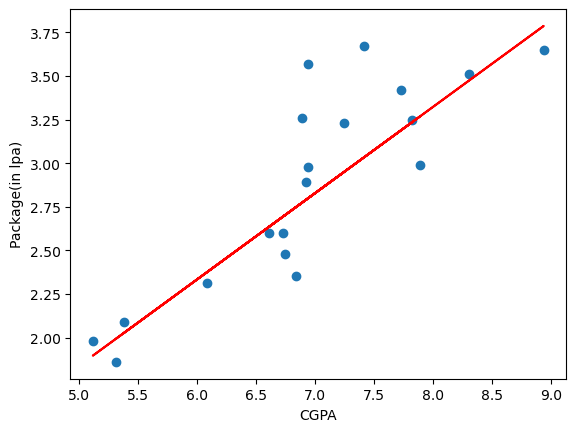

In [42]:
plt.scatter(df['cgpa'],df['package '])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

#### calculate m and b using sklearn

In [43]:
m = lr.coef_
m

array([0.49513786])

In [44]:
b = lr.intercept_
b

-0.6392610314300482

#### Claculate the y

In [45]:
# y = mx + b
m * 8.58 + b

array([3.60902178])

In [46]:
m * 9.5 + b

array([4.0645486])

#### Function is also work on that point (x=100) which is not present in the dataset 

In [47]:
m * 100 + b

array([48.87452459])

## (II) Calculate value of m and b using class MeraLR

#### Create a MeraLR class that contain __init__() , fit() , and predict() function

In [48]:
class MeraLR:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)       
    
    def predict(self,X_test):
        
        print(X_test)
        
        return self.m * X_test + self.b

#### Import required library

In [49]:
import numpy as np
import pandas as pd

#### Read the csv file

In [50]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [51]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [52]:
X

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94])

In [53]:
y

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98])

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [55]:
X_train.shape

(15,)

#### calculate m and b

In [57]:
lr = MeraLR()
lr.fit(X_train,y_train)

0.49513785623297796
-0.6392610314300495


In [58]:
X_train.shape[0]

15

In [59]:
X_train[0]

5.32

In [60]:
X_train.mean()

6.8020000000000005

In [61]:
X_test[0]

8.31

#### Evaluating or testing the model

In [62]:
print(lr.predict(X_test[0]))

8.31
3.475334553865997
